# Praxis - Hyperparameter

Hier wird wieder auf den MNIST Datensatz zurückgegriffen, um den Einfluss der Learning Rate auf die Performance des Netzes zu zeigen

## Import der benötigten Bibliotheken und Klassen

In [0]:
# magic command for Colab Notebooks
%tensorflow_version 2.x

import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Activation, Input, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt

# jupyters magic command
%matplotlib inline

TensorFlow 2.x selected.


## Laden des MNIST Datensatzes

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(len(x_train), ' train images found')
print(len(x_test), ' test images found')


11493376/11490434 [==============================] - 0s 0us/step
60000  train images found
10000  test images found


## Anpassung des MNIST Datensatzes

Hier werden für das Training nur 1/7 der Trainingsdaten verwendet

In [0]:
NUM_PICTURES = len(x_train)//7
NUM_TEST_PICTURES = len(y_train)
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train[:NUM_PICTURES]
y_train = y_train[:NUM_PICTURES]
x_test = x_test[:NUM_TEST_PICTURES]
y_test = y_test[:NUM_TEST_PICTURES]
print(len(x_train), ' train images used')
print(len(x_test), ' test images used')

8571  train images used
10000  test images used


Da Keras 4D Tensoren für die Verarbeitung erwartet, werden hier die Daten reshaped

In [0]:
x_train = np.reshape(x_train, [len(x_train), 28, 28, 1])
x_test = np.reshape(x_test, [len(x_test), 28, 28, 1])
print('shape: ', x_train.shape)

shape:  (8571, 28, 28, 1)


Um mit der Categorical Crossentropy Funktion zu arbeiten werden die Labels in `categorical` labels umgewandelt

In [0]:
# convert class vectors to one-hot-encodings
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

## Helpers

## Über das `deeplearning2020` python package stellen wir euch folgende helper Funktionen zur Verfügung:

- def plot_learning_curve(title, x, y, y_test, ylim=0.6)
- def plot_history(title, history, ylim=0.6)
- def plot_images(images, labels)

## Zur Nutzung der Funktionen geht ihr folgendermaßen vor:

In [0]:
# Importieren der Helper Function
!pip install --upgrade deeplearning2020

from deeplearning2020 import helpers

#helpers.plot_images(image, labels)

     |████████████████████████████████| 399kB 55.6MB/s 
  Created wheel for deeplearning2020: filename=deeplearning2020-0.4.8-py2.py3-none-any.whl size=6424 sha256=251f66b5788389752705e3dfbe49d92c627e1e7f244fd5264e68d75d0fb3032d
  Stored in directory: /root/.cache/pip/wheels/e3/b0/4a/8a76f8d4841cbb93d270edd2a88685d7209aef0a08d0af2fc6
  Created wheel for kerasltisubmission: filename=kerasltisubmission-0.4.5-py2.py3-none-any.whl size=7532 sha256=8c619c6ee8352cb21e7ce795641e0ae1cc460c64bc0fe494897fe4375c6ebe08
  Stored in directory: /root/.cache/pip/wheels/17/0e/e3/6022cb4bec452a01b8629e91249cdb917c7c509270bf314a0b
Successfully built deeplearning2020 kerasltisubmission


## Hier wird das Model definiert

In [0]:
def get_untrained_model():
    # input images must have size 28x28px
    input_layer = Input(shape=(28, 28, 1))

    # Convolutional neural network
    model = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(input_layer)
    model = MaxPooling2D((2, 2))(model)
    model = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(model)
    model = MaxPooling2D((2, 2))(model)

    # Fully-Connected-Classifier
    model = Flatten()(model)
    model = Dense(100, activation='relu')(model)

    # Output Layer
    output_layer = Dense(10, activation='sigmoid')(model)
    
    return Model(input_layer, output_layer)

In [0]:
mnist_model = get_untrained_model()

mnist_model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])
mnist_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               80100 

## Hier werden die Models mit verschiedener Learnig Rate trainiert

Folgende Learning Rates wurden genutzt
-  learning_rate=0.001
- learning_rate=0.00001
- learning_rate=10

In [0]:
# compile model
model = get_untrained_model()
model.compile(
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# train model
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    validation_data=(x_test, y_test)
)


Train on 8571 samples, validate on 10000 samples
Epoch 1/10
8571/8571 [==============================] - 2s 220us/sample - loss: 0.5619 - accuracy: 0.8270 - val_loss: 0.2061 - val_accuracy: 0.9364
Epoch 2/10
8571/8571 [==============================] - 1s 174us/sample - loss: 0.1669 - accuracy: 0.9525 - val_loss: 0.1412 - val_accuracy: 0.9553
Epoch 3/10
8571/8571 [==============================] - 2s 177us/sample - loss: 0.1222 - accuracy: 0.9635 - val_loss: 0.1461 - val_accuracy: 0.9586
Epoch 4/10
8571/8571 [==============================] - 2s 175us/sample - loss: 0.0955 - accuracy: 0.9704 - val_loss: 0.0844 - val_accuracy: 0.9744
Epoch 5/10
8571/8571 [==============================] - 2s 182us/sample - loss: 0.0714 - accuracy: 0.9786 - val_loss: 0.0948 - val_accuracy: 0.9722
Epoch 6/10
8571/8571 [==============================] - 2s 179us/sample - loss: 0.0532 - accuracy: 0.9840 - val_loss: 0.1043 - val_accuracy: 0.9696
Epoch 7/10
8571/8571 [==============================] - 2s 177u

In [0]:
mnist_model_low_lr = get_untrained_model()
mnist_model_low_lr.compile(
    optimizer = tf.keras.optimizers.Adam(lr=0.00001), 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy']
    )
history_low_lr = mnist_model_low_lr.fit(
    x_train, 
    y_train, 
    batch_size = 32, 
    epochs = 10, 
    validation_data = (x_test, y_test)
    )

Train on 8571 samples, validate on 10000 samples
Epoch 1/10
8571/8571 [==============================] - 2s 216us/sample - loss: 2.2838 - accuracy: 0.1376 - val_loss: 2.2656 - val_accuracy: 0.1629
Epoch 2/10
8571/8571 [==============================] - 1s 174us/sample - loss: 2.2426 - accuracy: 0.1792 - val_loss: 2.2200 - val_accuracy: 0.2467
Epoch 3/10
8571/8571 [==============================] - 2s 177us/sample - loss: 2.1878 - accuracy: 0.3073 - val_loss: 2.1539 - val_accuracy: 0.3727
Epoch 4/10
8571/8571 [==============================] - 2s 180us/sample - loss: 2.1014 - accuracy: 0.4280 - val_loss: 2.0424 - val_accuracy: 0.5042
Epoch 5/10
8571/8571 [==============================] - 2s 177us/sample - loss: 1.9485 - accuracy: 0.5573 - val_loss: 1.8372 - val_accuracy: 0.6576
Epoch 6/10
8571/8571 [==============================] - 2s 178us/sample - loss: 1.6691 - accuracy: 0.7185 - val_loss: 1.5010 - val_accuracy: 0.7506
Epoch 7/10
8571/8571 [==============================] - 1s 174u

In [0]:
mnist_model_high_lr = get_untrained_model()
mnist_model_high_lr.compile(
    optimizer = tf.keras.optimizers.Adam(lr=10), 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy']
    )
history_high_lr = mnist_model_low_lr.fit(
    x_train, 
    y_train, 
    batch_size = 32, 
    epochs = 10, 
    validation_data = (x_test, y_test)
    )

Train on 8571 samples, validate on 10000 samples
Epoch 1/10
8571/8571 [==============================] - 2s 177us/sample - loss: 0.6888 - accuracy: 0.8434 - val_loss: 0.6637 - val_accuracy: 0.8441
Epoch 2/10
8571/8571 [==============================] - 2s 183us/sample - loss: 0.6261 - accuracy: 0.8523 - val_loss: 0.6116 - val_accuracy: 0.8547
Epoch 3/10
8571/8571 [==============================] - 1s 173us/sample - loss: 0.5779 - accuracy: 0.8584 - val_loss: 0.5686 - val_accuracy: 0.8575
Epoch 4/10
8571/8571 [==============================] - 2s 182us/sample - loss: 0.5397 - accuracy: 0.8640 - val_loss: 0.5340 - val_accuracy: 0.8659
Epoch 5/10
8571/8571 [==============================] - 2s 176us/sample - loss: 0.5083 - accuracy: 0.8689 - val_loss: 0.5044 - val_accuracy: 0.8686
Epoch 6/10
8571/8571 [==============================] - 2s 179us/sample - loss: 0.4823 - accuracy: 0.8741 - val_loss: 0.4804 - val_accuracy: 0.8758
Epoch 7/10
8571/8571 [==============================] - 2s 182u

## Auswertung

In den Diagrammen können nur die einzelnen Learning Rates verglichen werden.

Dabei ist zu beachten, dass diese als wichtigster Hyperparamter einen sehr bedeutenden Einfluss auf den Trainingserfolg hat

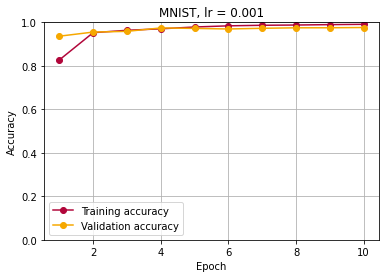

In [0]:
helpers.plot_history('MNIST, lr = 0.001', history, 0)

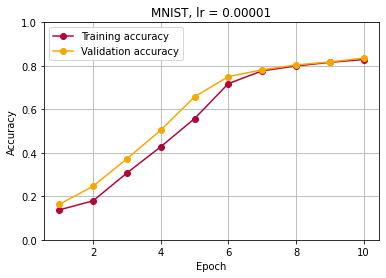

In [0]:
helpers.plot_history('MNIST, lr = 0.00001', history_low_lr, 0)

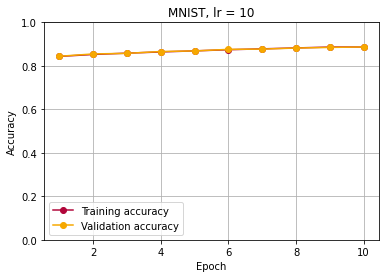

In [0]:
helpers.plot_history('MNIST, lr = 10', history_high_lr, 0)